In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [179]:
filaments = pd.read_csv("../data/p_web_rosette_0_filaments.csv")
filaments.rename( columns={'Unnamed: 0':'point'}, inplace=True )
catalog = pd.read_csv("../../CosmicWeb-VAC-DESI-EDR/data/radec_rosette_0_data.csv")

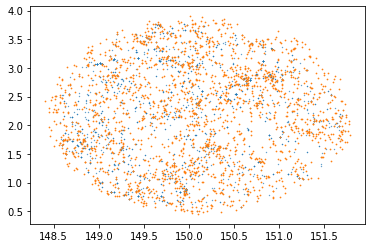

In [180]:
plt.scatter(filaments['ra_fila'], filaments['dec_fila'], s=0.1)
plt.scatter(catalog['RA'], catalog['DEC'], s=0.5)

(array([  4.,  25., 141., 199., 110., 187., 405., 268., 314., 222.]),
 array([0.03321295, 0.05983383, 0.08645471, 0.11307558, 0.13969646,
        0.16631733, 0.19293821, 0.21955908, 0.24617996, 0.27280083,
        0.29942171]),
 <BarContainer object of 10 artists>)

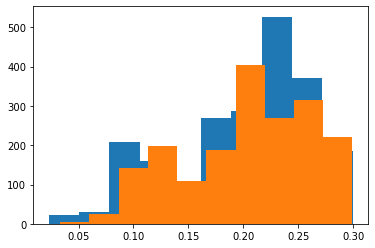

In [181]:
plt.hist(catalog['Z'])
plt.hist(filaments['redshift_fila'])

In [201]:
n_gals = len(catalog)
n_filaments = len(filaments)
phi_galaxies = np.ones(n_gals)
phi_filaments = np.ones(n_gals)
delta_ra = np.ones(n_gals)
delta_dec = np.ones(n_gals)
for i in range(n_gals):
    d = np.sqrt((filaments['ra_fila']-catalog['RA'][i])**2 + (filaments['dec_fila']-catalog['DEC'][i])**2)
    z = np.abs(filaments['redshift_fila']-catalog['Z'][i])
    ii = (d<0.30) #& (z<0.1)
    
    point_id = np.arange(n_filaments)[ii]
    fil_id = np.array(filaments['id_fila'][ii])
    d_close = np.array(d[ii])
    z_close = np.array(z[ii])
    ii_zmin = np.argmin(z_close)
    #print(fil_id)
    
    #this_fil_id = 
    #print(fil_id[ii_zmin], d_close[ii_zmin], z_close[ii_zmin])
    
    e1 = catalog['SHAPE_E1'][i]
    e2 = catalog['SHAPE_E2'][i]
    
    epsilon = np.sqrt(e1**2 + e2**2)
    phi = np.rad2deg(0.5*np.arctan2(e1,e2))
    phi_galaxies[i] = phi
#    print(epsilon, phi)
    nearest_fil = fil_id[ii_zmin]
    fil = filaments[filaments['id_fila']==nearest_fil]
    
    i_final = np.where(fil['point']==point_id[ii_zmin])[0][0]
    ra_fil = -np.array(fil['ra_fila'])#minus sign to account for directions on the sky
    dec_fil = np.array(fil['dec_fila'])
    delta_ra[i] = ra_fil[i_final] - (ra_fil[i_final-1])
    delta_dec[i] = dec_fil[i_final] - (dec_fil[i_final-1])

    #print(fil, point_id[ii_zmin], i_final, delta_ra[i])


ii = phi_galaxies< 0.0
phi_galaxies[ii] = 180.0 + phi_galaxies[ii]


phi_filaments = np.rad2deg(0.5*np.arctan2(np.deg2rad(delta_ra), np.deg2rad(delta_dec)))
ii = phi_filaments< 0.0
phi_filaments[ii] = 180.0 + phi_filaments[ii]


ii = (phi_filaments>1E-5) & (phi_galaxies>1E-5)
phi_filaments = np.deg2rad(phi_filaments[ii])
phi_galaxies = np.deg2rad(phi_galaxies[ii])

x_galaxies = np.cos(phi_galaxies)
y_galaxies = np.sin(phi_galaxies)

x_filaments = np.cos(phi_filaments)
y_filaments = np.sin(phi_filaments)

mu = np.abs(x_galaxies*x_filaments + y_galaxies*y_filaments)

ids = np.arange(len(x_galaxies))
np.random.shuffle(ids)
mu_random = np.abs(x_galaxies[ids]*x_filaments + y_galaxies[ids]*y_filaments)

(array([177., 183., 181., 206., 176., 279., 150., 200., 192., 191.]),
 array([0.00930307, 0.32237159, 0.63544011, 0.94850862, 1.26157714,
        1.57464565, 1.88771417, 2.20078268, 2.5138512 , 2.82691971,
        3.13998823]),
 <BarContainer object of 10 artists>)

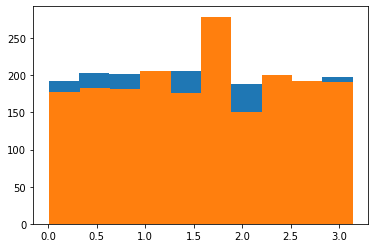

In [202]:
plt.hist(phi_galaxies)
plt.hist(phi_filaments)

(array([ 46., 107., 196., 297., 345., 335., 258., 209., 102.,  40.]),
 array([-3.10466935, -2.48939302, -1.87411669, -1.25884036, -0.64356404,
        -0.02828771,  0.58698862,  1.20226495,  1.81754128,  2.43281761,
         3.04809393]),
 <BarContainer object of 10 artists>)

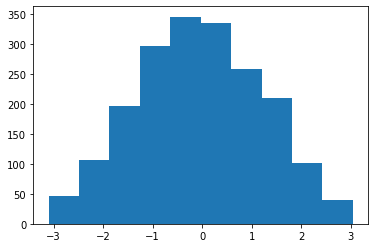

In [203]:
plt.hist(phi_galaxies-phi_filaments)

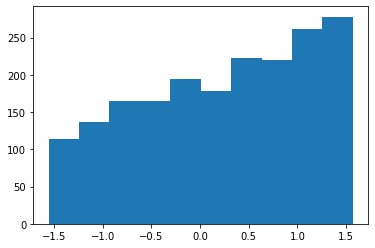

In [205]:
delta_phi = phi_galaxies - phi_filaments
ii = delta_phi > np.pi/2.0
delta_phi[ii] = np.pi - delta_phi[ii] 

ii = delta_phi < -np.pi/2.0
delta_phi[ii] = np.pi - np.abs(delta_phi[ii])

_ = plt.hist(delta_phi)

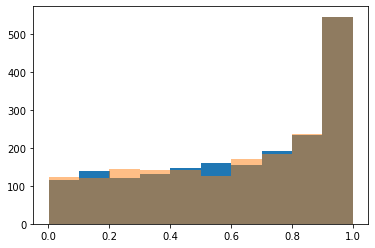

In [186]:
_ = plt.hist(mu, bins=10)
_ = plt.hist(mu_random, alpha=0.5, bins=10)

(array([177., 183., 181., 206., 176., 279., 150., 200., 192., 191.]),
 array([0.00930307, 0.32237159, 0.63544011, 0.94850862, 1.26157714,
        1.57464565, 1.88771417, 2.20078268, 2.5138512 , 2.82691971,
        3.13998823]),
 <BarContainer object of 10 artists>)

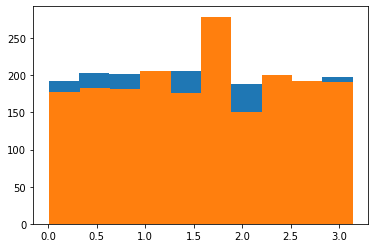

In [184]:
plt.hist(phi_galaxies)
plt.hist(phi_filaments)

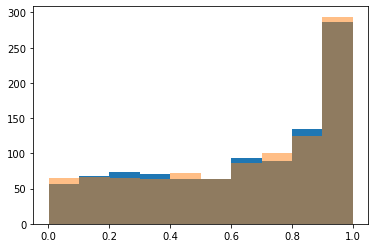

In [173]:
phi_galaxies = np.random.random(1000)*2.0*np.pi
phi_filaments = np.random.random(1000)*2.0*np.pi


x_galaxies = np.cos(phi_galaxies)
y_galaxies = np.sin(phi_galaxies)

x_filaments = np.cos(phi_filaments)
y_filaments = np.sin(phi_filaments)

mu = np.abs(x_galaxies*x_filaments + y_galaxies*y_filaments)

ids = np.arange(len(x_galaxies))
np.random.shuffle(ids)
mu_random = np.abs(x_galaxies[ids]*x_filaments + y_galaxies[ids]*y_filaments)

_ = plt.hist(mu, bins=10)
_ = plt.hist(mu_random, alpha=0.5, bins=10)

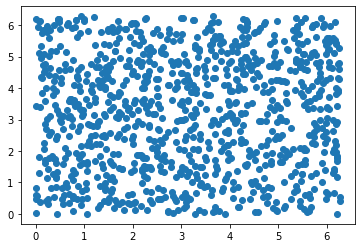

In [177]:
plt.scatter(phi_filaments, phi_galaxies)

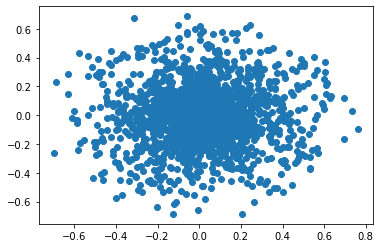

In [68]:
plt.scatter(catalog['SHAPE_E1'], catalog['SHAPE_E2'])

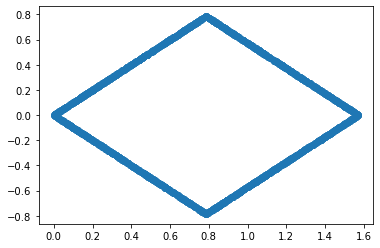

In [74]:
e = np.sqrt(catalog['SHAPE_E1']**2 + catalog['SHAPE_E2']**2)
plt.scatter(0.5*np.arccos(catalog['SHAPE_E1']/e), 0.5*np.arcsin(catalog['SHAPE_E2']/e))

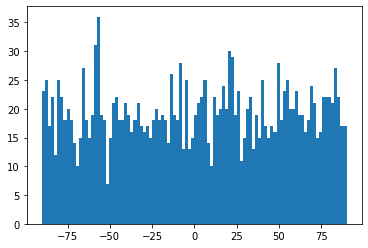

In [67]:
_ = plt.hist(phi_galaxies, bins=100)

In [3]:
def summary_filament(data_filaments, id_filament):
    # define a coordinate system from the data_filaments
    los_vector_hat = np.array([np.sum(data['x_fila']), np.sum(data['y_fila']), np.sum(data['z_fila'])])
    los_vector_hat = los_vector_hat/np.sqrt(np.dot(los_vector_hat, los_vector_hat))
    perp_los_vector_hat_A  = np.array([-los_vector_hat[1], los_vector_hat[0], 0])
    perp_los_vector_hat_B = np.cross(los_vector_hat, perp_los_vector_hat_A)
    
    ii = np.int_(data_filaments['id_fila'])==id_filament
    coordinates = np.array(data_filaments[['x_fila','y_fila', 'z_fila']][ii])
    
    n_points = len(coordinates)
    #print(n_points)
    mu_par = np.zeros(n_points-2)
    mu_perp_A = np.zeros(n_points-2)
    mu_perp_B = np.zeros(n_points-2)
    filament_len = 0
    for i in range(1,n_points-1):
        r_center = coordinates[i]
        r_left = coordinates[i-1]
        r_right = coordinates[i+1]
        delta_r = r_right - r_left
        delta_r_hat = delta_r / np.sqrt(np.dot(delta_r, delta_r))
        r_center_hat = r_center / np.sqrt(np.dot(r_center, r_center))
    
        filament_len +=  np.sqrt(np.dot(delta_r, delta_r))
    
        r_par = r_center_hat * np.dot(delta_r, r_center_hat)
        r_perp = delta_r - r_par
        mu_par[i-1] = np.dot(delta_r_hat, r_center_hat)
        mu_perp_A[i-1] = np.dot(delta_r_hat, perp_los_vector_hat_A)
        mu_perp_B[i-1] = np.dot(delta_r_hat, perp_los_vector_hat_B)
    return mu_par, mu_perp_A, mu_perp_B, np.ones(n_points-2)*filament_len

In [64]:
data = pd.read_csv("../data/p_web_rosette_17_filaments.csv")

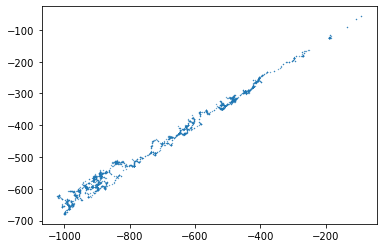

In [65]:
plt.scatter(data['x_fila'], data['y_fila'], s=0.1)

In [66]:
id_filaments = np.array(list(set(data['id_fila'])), dtype='int')
mu_par = np.empty((0))
mu_perp_A = np.empty((0))
mu_perp_B = np.empty((0))
filament_len = np.empty((0))
for id_fil in id_filaments:
    mu_par_tmp, mu_perp_A_tmp, mu_perp_B_tmp, len_tmp = summary_filament(data, id_fil)
    mu_par = np.append(mu_par, mu_par_tmp)
    mu_perp_A = np.append(mu_perp_A, mu_perp_A_tmp)
    mu_perp_B = np.append(mu_perp_B, mu_perp_B_tmp)
    filament_len = np.append(filament_len, len_tmp)

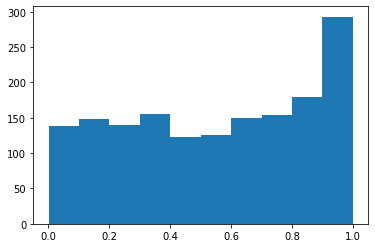

In [67]:
_ = plt.hist(np.abs(mu_par))

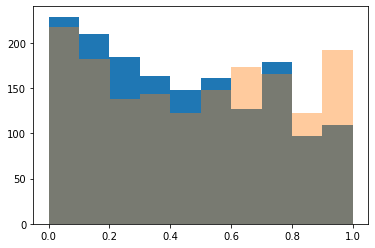

In [69]:
ii = (filament_len<300) & (filament_len>0)
_ = plt.hist(np.abs(mu_perp_A[ii]))
_ = plt.hist(np.abs(mu_perp_B[ii]), alpha=0.4)

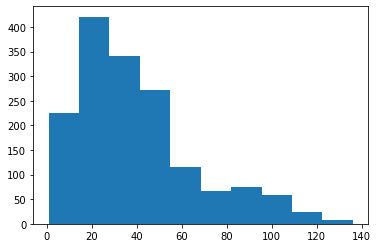

In [70]:
_ = plt.hist(filament_len)

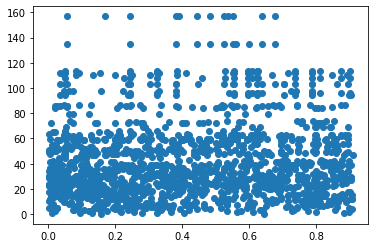

In [60]:
plt.scatter(np.abs(mu_perp_A), filament_len)

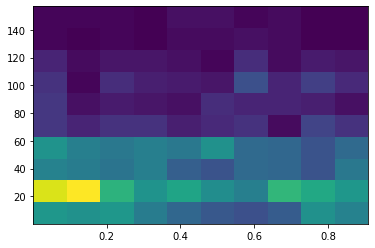

In [61]:
_ = plt.hist2d(np.abs(mu_perp_A), filament_len)

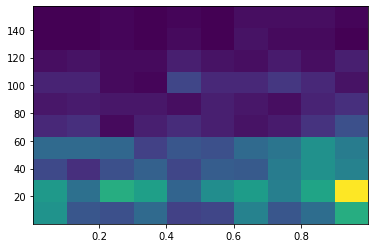

In [62]:
_ = plt.hist2d(np.abs(mu_par), filament_len)

(-309.143575, -46.406925, 92.70575000000001, 554.3812499999999)

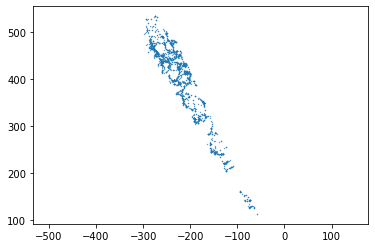

In [63]:
plt.scatter(data['y_fila'], data['z_fila'], s=0.1)
plt.axis('equal')

(array([319., 434., 327., 212., 106.,  30.,  25.,   0.,  14.,  33.]),
 array([  0.69810489,  17.83508866,  34.97207242,  52.10905619,
         69.24603995,  86.38302372, 103.52000748, 120.65699125,
        137.79397501, 154.93095878, 172.06794254]),
 <BarContainer object of 10 artists>)

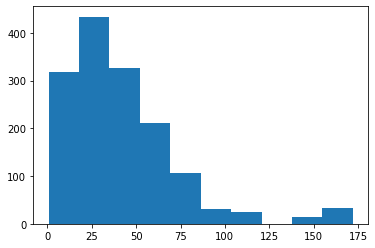

(32.4, 683.6, 15.502049999999997, 532.45695)

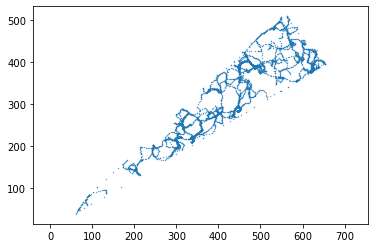

In [73]:
plt.scatter(data['x_fila'], data['y_fila'], s=0.1)
plt.axis('equal')